# Setting the beta hyper-parameters

User inputs the mean m and the interval [l, u] where

$$ p(l < \theta < u) = 0,95 .$$

Then, the program determine the hyper parameters of the beta distribution $$ B(\alpha_1, \alpha_2)$$

We will use the authors suggestions. First, 
$$m = \frac{\alpha_1}{\alpha_1 + \alpha_2}$$
$$\alpha_2 = \alpha_1(1/m - 1)$$

Second, we will minimize the squared difference between the probability mass in the interval [l, u] and 0.95 to arrive at the desired result:

$$\left(\int_l^u p(\theta) - 0.95\right)^2$$

## Input data

User must input the mean m and the bounds of the integral (l, u). Keep in mind the following restrictions:

* m in (0, 1)
* l <= u
* l,u in [0, 1]


In [33]:
while True:
    m = input('Choose the mean: ')
    m = float(m)
    if m <= 0 or m >= 1.0:
        print("Invalid mean. Choose value between 0 and 1.")
    else:
        break
while True:
    l = input('Choose lower bound: ')
    l = float(l)
    if l < 0 or l > 1.0:
        print("Invalid lower bound. Choose value between 0 and 1.")
    else:
        break
while True:
    u = input('Choose upper bound: ')
    u = float(u)
    if u < 0 or u > 1.0:
        print("Invalid upper bound. Choose value between 0 and 1.")
    elif u < l:
        print("Upper bound should be bigger than lower bound")
    else:
        break
print("\n")
print("Parameters setted by the user:")        
print("Mean\tm = {}".format(m))
print("Lower bound\tl = {}".format(l))
print("Upper bound\tu = {}".format(u))

Choose the mean: 0.4
Choose lower bound: 0.1
Choose upper bound: 0.8


Parameters setted by the user:
Mean	m = 0.4
Lower bound	l = 0.1
Upper bound	u = 0.8


## Auxiliary functions

We will create some utility functions to compute the integrand expression 
$$expr = \frac{1}{B(\alpha_1, \alpha_2)}\theta^{(\alpha_1 - 1)}(1 - \theta)^{(\alpha_1(\frac{1}{m} - 1) - 1)}$$

and the objective function

$$(\int_l^u expr d\theta - 0.95)^2$$

In [34]:
import numpy as np
import scipy
from scipy import integrate, special

In [35]:
def expression(theta, alpha1, m):
    
    """Expression for the integrand"""
    
    beta = special.beta(alpha1, alpha1*(1/m-1))
    expr = (theta ** (alpha1 - 1)) * (1 - theta) ** (alpha1 * (1/m - 1) - 1)
    expr /= beta
    return expr

In [36]:
def func_value(alpha1, m, l, u):

    """Objective function"""
    
    integral = (integrate.quad(expression, l, u, args=(alpha1, m)))
    final_expression = (integral[0] - 0.95) ** 2
    return final_expression

In [37]:
#Test different values of alhpa1 to get a felling of the behaviour of the function
alpha1 = 0.3
func_value(alpha1, m, l, u)

0.2887553342140952

## Initial Visualization

Our objective function is 1-D in alpha1. Therefore, we should plot the function in a big interval to get a general idea where we should put the initial point of the optimization

In [38]:
x = np.linspace(0, 10, 1000)
y = np.zeros(x.shape)
for count, element in enumerate(x):
    y[count] = func_value(element, m, l, u)

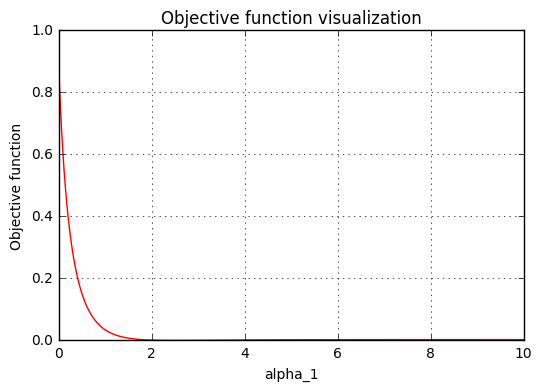

In [39]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.figure()
plt.plot(x, y, 'r')
plt.xlabel('alpha_1')
plt.ylabel('Objective function')
plt.title('Objective function visualization')
plt.grid()
plt.show()

## Optimization

Perform the optimization of our constrained objective function. We only have one constraint in this problem: $$\alpha_1 > 0$$

In [40]:
from scipy.optimize import minimize

In [41]:
opt_result = minimize(
    func_value, 
    x0 = 0.25, 
    args=(m, l, u), 
    method='L-BFGS-B', 
    jac=None, 
    bounds=((0, None),), 
    tol=None, 
    callback=None, 
    options={
        'disp': None, 
        'maxls': 20, 
        'iprint': -1, 
        'gtol': 1e-05, 
        'eps': 1e-08, 
        'maxiter': 15000, 
        'ftol': 2.220446049250313e-09, 
        'maxcor': 10, 
        'maxfun': 15000}
)
alpha1_opt = opt_result.x
opt_value = func_value(alpha1_opt, m, l, u)
print("optimum argument: {0}\toptimum value: {1}".format(alpha1_opt, opt_value))

optimum argument: [ 2.45852244]	optimum value: 9.568643470559707e-11


## Final visualization

With the result of our optimization in hands, we can generate a final visualization zoomed in the point of interest

In [42]:
x = np.linspace(opt_result.x * 0.75, opt_result.x * 1.25, 1000)
y = np.zeros(x.shape)
for count, element in enumerate(x):
    y[count] = func_value(element, m, l, u)

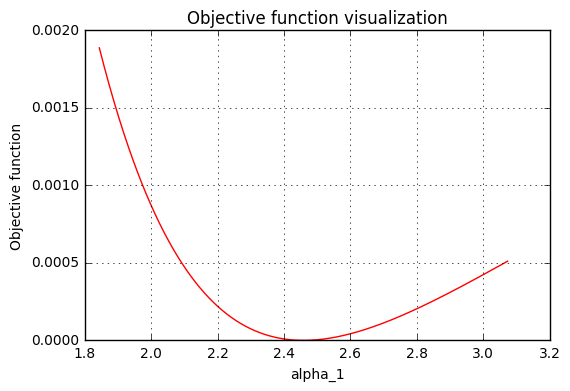

In [43]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.figure()
plt.plot(x, y, 'r')
plt.xlabel('alpha_1')
plt.ylabel('Objective function')
plt.title('Objective function visualization')
plt.grid()
plt.show()

## Calculate the hyper parameters

In [44]:
alpha1 = opt_result.x
alpha2 = alpha1 * (1/m - 1)
alpha = b"\xce\xb1".decode('utf-8')
print("{}1 = {}".format(alpha, alpha1))
print("{}2 = {}".format(alpha, alpha2))


α1 = [ 2.45852244]
α2 = [ 3.68778366]


<img src="https://media.giphy.com/media/LgwoVr7YgUkrC/giphy.gif">